# A09

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("C:\\Users\\dayan\\Downloads\\Lab aprendizaje estadístico\\Motor Trend Car Road Tests.xlsx")
X = data[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = data['mpg']
X_const = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(y, X_const).fit()
valores_ajustados = model.fittedvalues
residuos = model.resid


### 1. NO LINEALIDAD (Non-linearity)

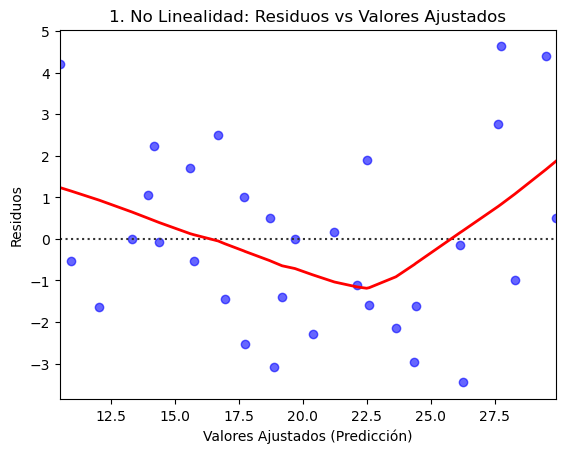

In [18]:
plt.figure()
sns.residplot(x=valores_ajustados, y=residuos, lowess=True, 
              scatter_kws={'color': 'blue', 'alpha': 0.6},
              line_kws={'color': 'red', 'lw': 2})
plt.title('1. No Linealidad: Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados (Predicción)')
plt.ylabel('Residuos')
plt.show()

Como la curva roja está curvada, hay no linealidad.

### 2. CORRELACIÓN DE ERRORES

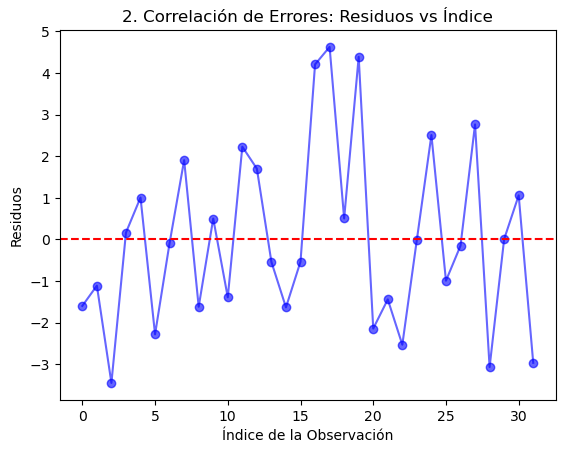

Correlación en errores: 0.0312244101592169


In [19]:
plt.figure()
plt.plot(residuos.index, residuos, marker='o', linestyle='-', color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('2. Correlación de Errores: Residuos vs Índice')
plt.xlabel('Índice de la Observación')
plt.ylabel('Residuos')
plt.show()

rho = residuos.autocorr(lag=1)
print("Correlación en errores:" + " "+ str(rho))

No parece haber patrones taan claros en la gráfica, entonces no hay correlación.

### 3. VARIANZA NO CONSTANTE (Heterocedasticidad, Homocedasticidad)

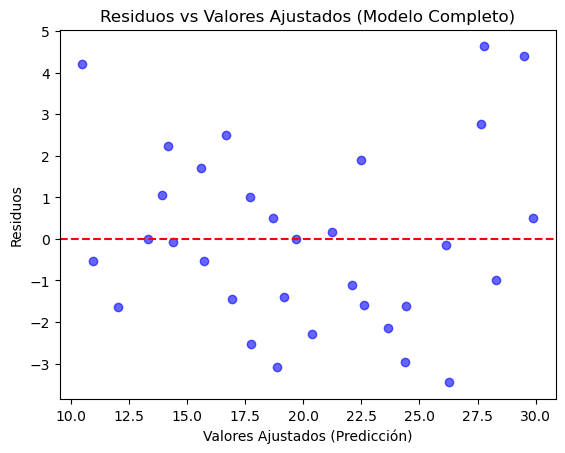

In [20]:
plt.figure()
plt.scatter(valores_ajustados, residuos, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Ajustados (Modelo Completo)')
plt.xlabel('Valores Ajustados (Predicción)')
plt.ylabel('Residuos')
plt.show()

Como NO hay una ligera forma de embudo, no es heterocedasticidad.

### 4. OUTLIERS

Criterio: Residuo Estudentizado > 3
Outliers detectados: Ninguno


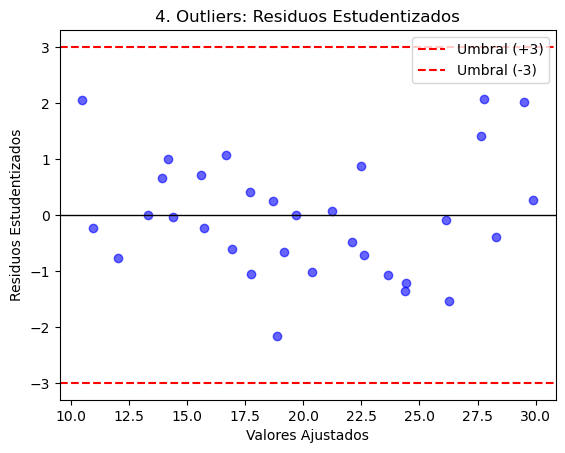

In [21]:
outliers_idx = np.where(np.abs(residuos_estudentizados) > 3)[0]
outliers_names = data.index[outliers_idx].tolist() if len(outliers_idx) > 0 else "Ninguno"

print("Criterio: Residuo Estudentizado > 3")
print("Outliers detectados: " + str(outliers_names))

plt.figure()
plt.scatter(valores_ajustados, residuos_estudentizados, color='blue', alpha=0.6)
plt.axhline(3, color='red', linestyle='--', label='Umbral (+3)')
plt.axhline(-3, color='red', linestyle='--', label='Umbral (-3)')
plt.axhline(0, color='black', linewidth=1)
plt.title('4. Outliers: Residuos Estudentizados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

### 5. PUNTOS PALANCA 

Umbral de Leverage calculado: 1.0312


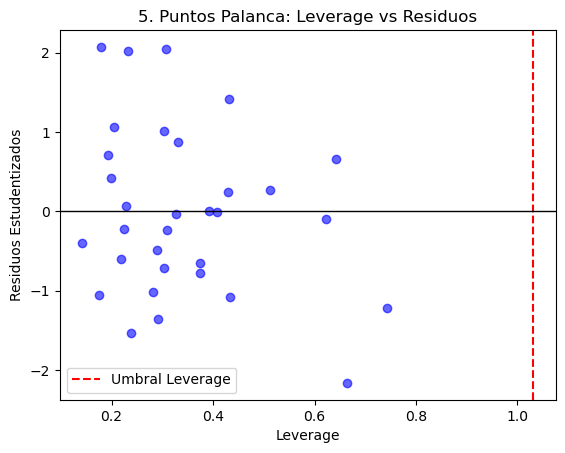

In [22]:
n = len(data)
p = X.shape[1]
leverage_promedio = (p + 1) / n
umbral_leverage = 3 * leverage_promedio

high_leverage_idx = np.where(leverage > umbral_leverage)[0]
high_leverage_names = data.index[high_leverage_idx].tolist() if len(high_leverage_idx) > 0 else "Ninguno"

print("Umbral de Leverage calculado: " + str(round(umbral_leverage, 4)))

plt.figure()
plt.scatter(leverage, residuos_estudentizados, color='blue', alpha=0.6)
plt.axvline(umbral_leverage, color='red', linestyle='--', label='Umbral Leverage')
plt.axhline(0, color='black', linewidth=1)
plt.title('5. Puntos Palanca: Leverage vs Residuos')
plt.xlabel('Leverage')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

### 6. COLINEALIDAD

In [23]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) 
                   for i in range(len(X.columns))]

print(str(vif_data))

  Variable        VIF
0      cyl  15.373833
1     disp  21.620241
2       hp   9.832037
3     drat   3.374620
4       wt  15.164887
5     qsec   7.527958
6       vs   4.965873
7       am   4.648487
8     gear   5.357452
9     carb   7.908747


Si hay colinealidad con cyl, disp y wt